In [21]:
from stormvogel.model import Model, ModelType

lion = Model(name="lion", model_type=ModelType.DTMC)
init = lion.get_initial_state()
full = lion.new_state("full :D")
satisfied = lion.new_state("satisfied :)")
hungry = lion.new_state("hungry :(")
starving = lion.new_state("starving :((")
rawr = lion.new_state("rawr")
hunt = lion.new_state("hunt >:D")
desperate_hunt = lion.new_state("desparate hunt!")
dead = lion.new_state("dead...")

init.set_transitions([(1, satisfied)])
satisfied.set_transitions([(1, hungry)])
hungry.set_transitions([(1, hunt)])
starving.set_transitions([(1, desperate_hunt)])
hunt.set_transitions([(0.5, full), (0.3, starving), (0.2, satisfied)])
full.set_transitions([(1, satisfied)])
desperate_hunt.set_transitions([(0.2, full), (0.3, starving), (0.1, dead), (0.4, satisfied)])
lion.add_self_loops()


In [94]:
from stormvogel.show import show
from stormvogel.layout import Layout
vis = show(lion, show_editor=False, separate_labels=["dead...", "hunt >:D", "desparate hunt!"], layout=Layout("layouts/lion.json"))

Output()

Output()

In [88]:
def naive_value_iteration(model, steps, starting_state):
    if steps < 2:
        print("Need at least two steps")
        return
    if model.type != ModelType.DTMC:
        print("Only works for DTMC")
        return
    matrix_steps_states = [[0 for s in model.states] for x in range(steps)]
    matrix_steps_states[0][starting_state] = 1
    
    for current_step in range(steps-1):
        next_step = current_step + 1
        for s_id, s in model.get_states().items():
            branch = model.get_branch(s)
            for transition_prob, target in branch.branch:
                current_prob = matrix_steps_states[current_step][s_id]
                matrix_steps_states[next_step][target.id] += current_prob * transition_prob

    return matrix_steps_states
        

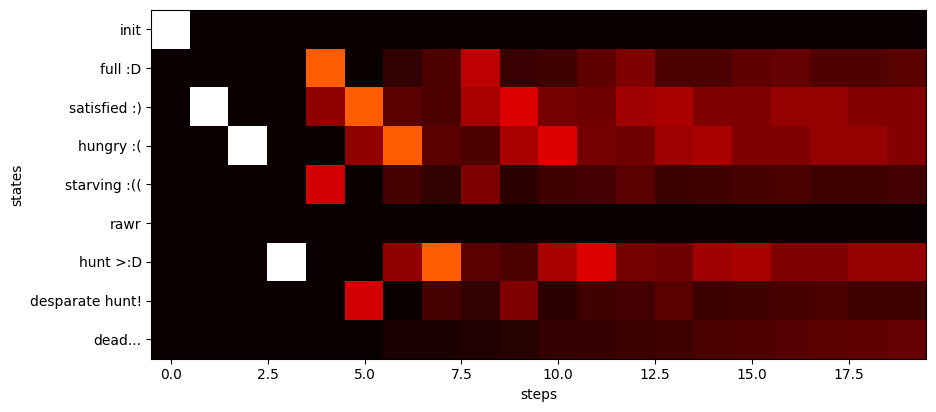

Output()

Output()

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def invert_2d_list(l):
    res = []
    for i in range(len(l[0])):
        sublist =  []
        for j in range(len(l)):
            sublist.append(l[j][i])
        res.append(sublist)
    return res
res = naive_value_iteration(lion, 20, starting_state=lion.get_initial_state().id)

def display_naive_value_iteration_result(res, size):
    fig, ax = plt.subplots(1,1)
    yticks = [s.labels[0] for s in lion.get_states().values()] + [""]
    ax.set_yticks(range(10))
    ax.set_yticklabels(yticks)
    
    ax.imshow(invert_2d_list(res), cmap='hot', interpolation='nearest', aspect="equal")
    plt.xlabel("steps")
    plt.ylabel("states")
    fig.set_size_inches(size,size)
    
    plt.show()

display_naive_value_iteration_result(res, 10)
vis = show(lion, show_editor=False, separate_labels=["dead...", "hunt >:D", "desparate hunt!"], layout=Layout("layouts/lion.json"))